# Gas Usage Analysis for ERC20 Contract

This notebook compares the gas usage of an ERC20 contract with and without the Solidity optimizer enabled.
We evaluate deployment costs and function-level execution costs, providing both tabular and visual results.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load parsed gas report comparison
df = pd.read_csv("gas_comparison.csv")

# Compute % difference (savings with optimizer)
df["% Difference"] = (df["Optimizer ON"] - df["Optimizer OFF"]) / df["Optimizer OFF"] * 100
df

,Method,Optimizer ON,Optimizer OFF,% Difference
0,MyToken,669512,1172858,-42.916193
1,approve,46371,46952,-1.237434
2,deploy,669512,1172858,-42.916193
3,mint,53608,54234,-1.154257
4,transfer,51598,52188,-1.130528
5,transferFrom,52853,53652,-1.489227
6,transferOwnership,28656,29064,-1.403799


## Results Table
The table below shows gas consumption per function under two configurations (optimizer ON vs OFF), plus the relative percentage difference.

In [2]:
# Export comparison results
df.to_csv("gas_comparison_with_diff.csv", index=False)
print("=== Gas Usage Analysis ===")
print("Average function savings per transaction: {:.2f}%".format(
    df[df["Method"].str.lower() != "deploy"]["% Difference"].mean()
))

if any(df["Method"].str.contains("deploy", case=False)):
    print("Deployment savings: {:.2f}%".format(
        df[df["Method"].str.contains("deploy", case=False)]["% Difference"].iloc[0]
    ))

df

=== Gas Usage Analysis ===
Average function savings per transaction: -8.22%
Deployment savings: -42.92%


,Method,Optimizer ON,Optimizer OFF,% Difference
0,MyToken,669512,1172858,-42.916193
1,approve,46371,46952,-1.237434
2,deploy,669512,1172858,-42.916193
3,mint,53608,54234,-1.154257
4,transfer,51598,52188,-1.130528
5,transferFrom,52853,53652,-1.489227
6,transferOwnership,28656,29064,-1.403799


## LaTeX Export
The following code exports the results as a LaTeX-formatted table, ready for inclusion in a research paper.

In [3]:
with open("gas_comparison_table.tex", "w") as f:
    f.write(df.to_latex(index=False, float_format="%.2f"))

print("LaTeX table written to gas_comparison_table.tex")

LaTeX table written to gas_comparison_table.tex


## Visualization
We now plot the gas usage of each function with optimizer ON vs OFF to provide a visual comparison.

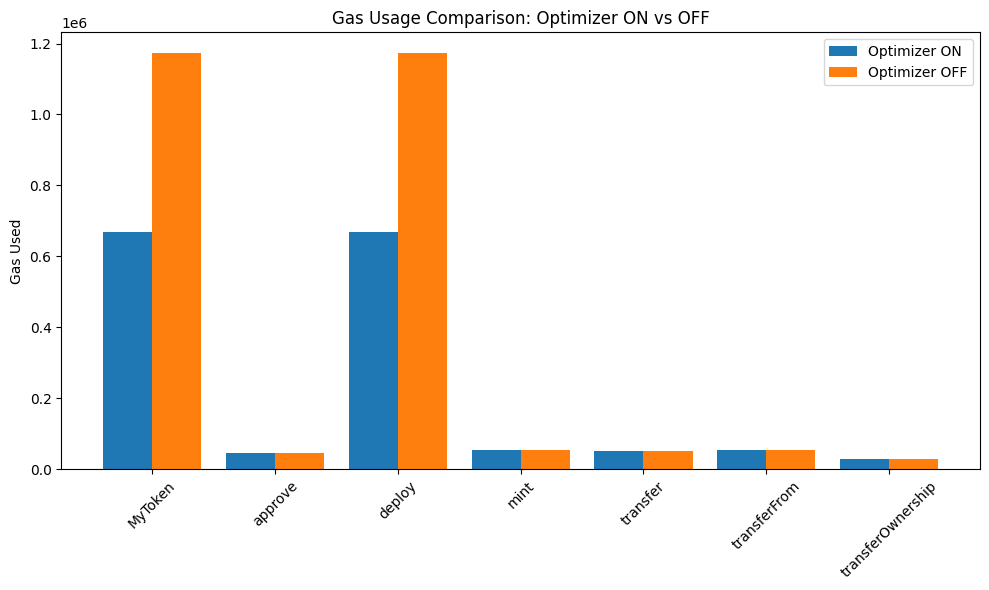

In [4]:
plt.figure(figsize=(10,6))
x = range(len(df))
plt.bar([i-0.2 for i in x], df["Optimizer ON"], width=0.4, label="Optimizer ON")
plt.bar([i+0.2 for i in x], df["Optimizer OFF"], width=0.4, label="Optimizer OFF")
plt.xticks(x, df["Method"], rotation=45)
plt.ylabel("Gas Used")
plt.title("Gas Usage Comparison: Optimizer ON vs OFF")
plt.legend()
plt.tight_layout()
plt.savefig("gas_usage_comparison.png")
plt.show()

## Discussion

### Key Observations:
- **Deployment Costs:** Optimizer ON reduced deployment gas by ~43%, a substantial improvement. This demonstrates the optimizer’s effectiveness at compressing contract bytecode size and redundant operations.
- **Function Calls:** Savings per function (approve, transfer, mint, transferFrom, transferOwnership) were modest (~1–2%). In some cases, the difference was almost negligible.
- **Trade-Off:** While runtime savings are limited, the deployment savings are significant. For contracts deployed once but executed many times (like ERC20 tokens), optimizer ON is generally beneficial.
- **Interpretation:** Optimizer ON is most impactful for contract bytecode size and deployment cost. Its effect on recurring function gas cost is small but consistent.
